In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as plot

In [ ]:
df= pd.read_csv('/content/smartphone_cleaned_v5.csv')

In [ ]:
df.head(1)

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,6.7,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    float64

In [ ]:
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,...,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,...,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,NaN


In [ ]:
df.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
resolution                     0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
dtype: int64

<Axes: >

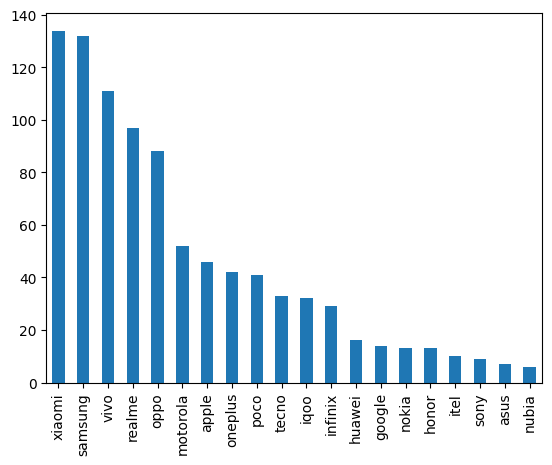

In [ ]:
# Top 20 brand names in indian markets in term of availability
df['brand_name'].value_counts().head(20).plot(kind='bar')

<Axes: ylabel='brand_name'>

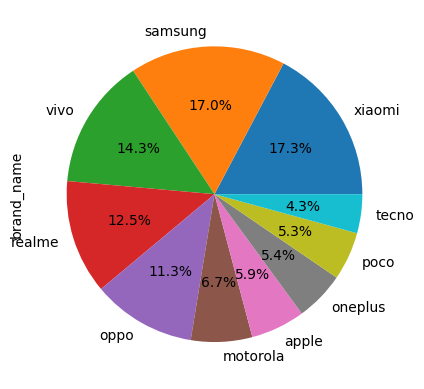

In [ ]:
# Top 10 brand names in indian markets in term of availability( % wise)
df['brand_name'].value_counts().head(10).plot(kind='pie', autopct= '%0.1f%%')

In [ ]:
# the distribution is not normal, it may be has somme outliers
df['price'].describe()

count       980.000000
mean      32520.504082
std       39531.812669
min        3499.000000
25%       12999.000000
50%       19994.500000
75%       35491.500000
max      650000.000000
Name: price, dtype: float64

In [ ]:
df['price'].sort_values(ascending = False).head(10)

427    650000
887    480000
478    239999
951    214990
458    199990
288    182999
756    179900
789    172999
739    169900
954    169000
Name: price, dtype: int64

6.591790999665567

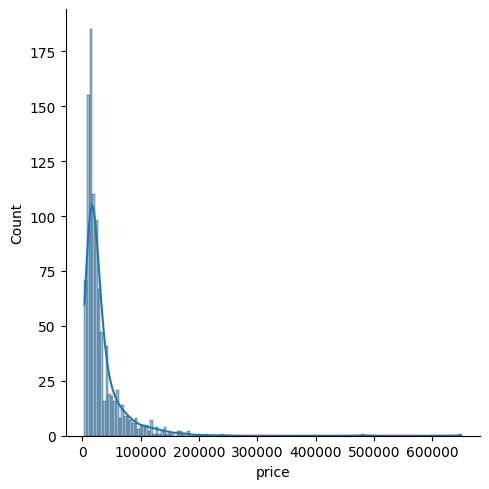

In [ ]:
# here we can see there is a skewness in this graph which means most of the phones are come from < 20K and there are so many outliers so we have to remove it.
sns.displot(kind='hist',data=df,x='price',kde=True)
df['price'].skew()

<Axes: >

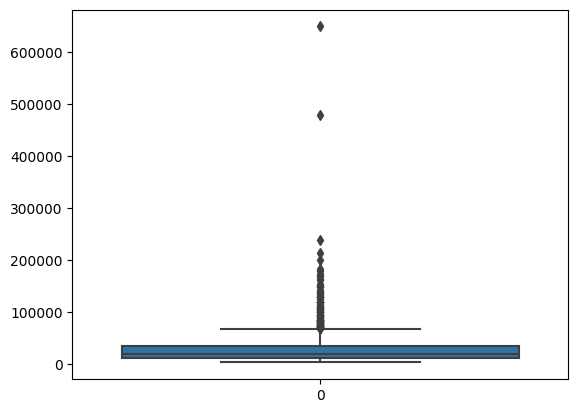

In [ ]:
# in this boxplot we can easily see some outliers
sns.boxplot(df['price'])

In [ ]:
# so here we fetch price value from beginning to < 2lakhs
df[df['price'] <200000]['price'].describe()

count       976.000000
mean      31029.820697
std       29870.079162
min        3499.000000
25%       12999.000000
50%       19990.000000
75%       34999.000000
max      199990.000000
Name: price, dtype: float64

<Axes: >

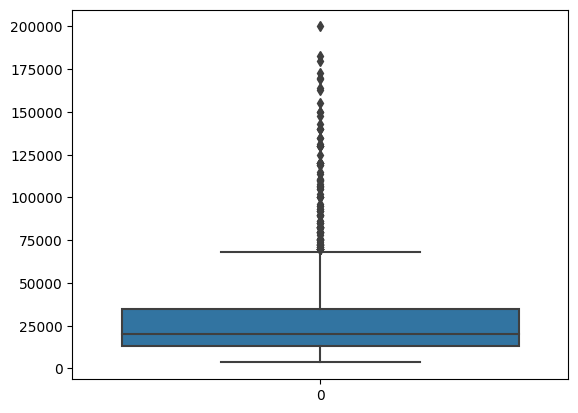

In [ ]:
sns.boxplot(df[df['price'] <200000]['price'])

In [ ]:
df['rating'].describe()

count    879.000000
mean      78.258248
std        7.402854
min       60.000000
25%       74.000000
50%       80.000000
75%       84.000000
max       89.000000
Name: rating, dtype: float64

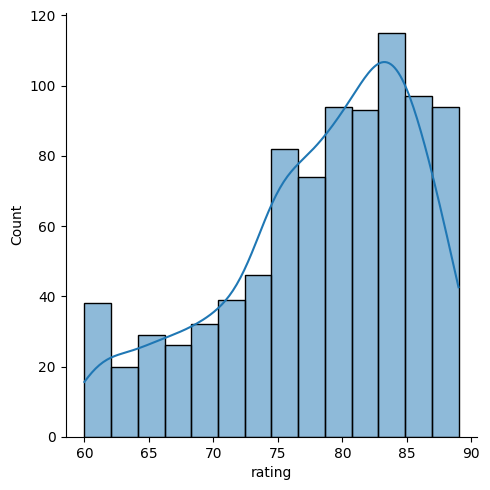

In [ ]:
# ratings is looks like normal
sns.displot(kind='hist',data=df,x='rating',kde=True)

In [ ]:
df['rating'].skew()

-0.6989993034105535

<Axes: >

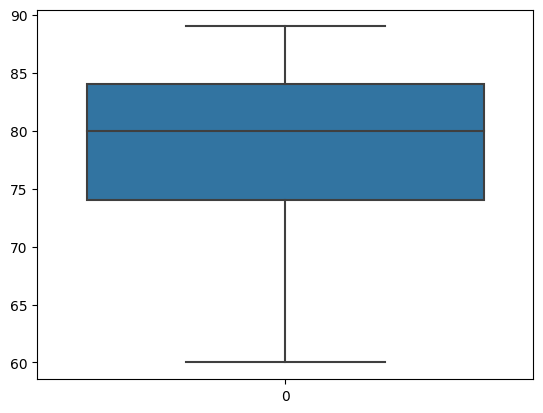

In [ ]:
sns.boxplot(df['rating'])

<Axes: ylabel='has_5g'>

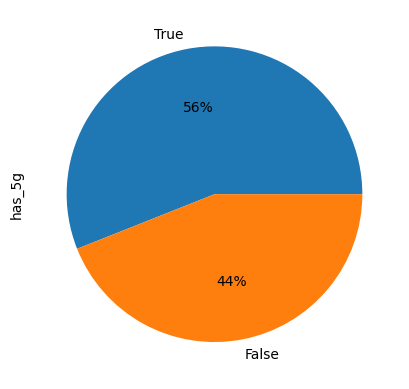

In [ ]:
# this pie chart shows % of phones which have 5G features
df['has_5g'].value_counts().plot(kind='pie',autopct='%0.0f%%')

<Axes: ylabel='has_nfc'>

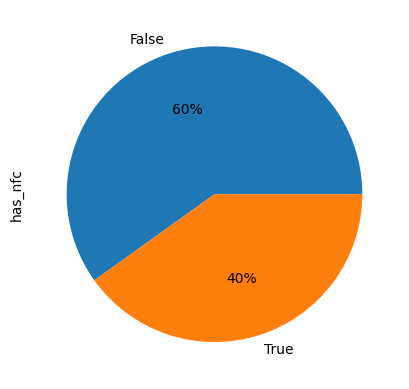

In [ ]:
# this pie chart shows % of phones which have nfs feature
df['has_nfc'].value_counts().plot(kind='pie',autopct='%0.0f%%')

<Axes: ylabel='has_ir_blaster'>

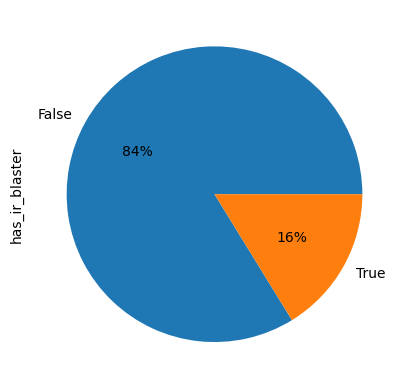

In [ ]:
# this pie chart shows % of phones which have IR_blaster features
df['has_ir_blaster'].value_counts().plot(kind='pie',autopct='%0.0f%%')

In [ ]:
df[df['has_ir_blaster']==True]['brand_name'].value_counts()

xiaomi     109
poco        30
iqoo         6
huawei       6
vivo         4
redmi        2
honor        1
samsung      1
Name: brand_name, dtype: int64

<Axes: ylabel='processor_brand'>

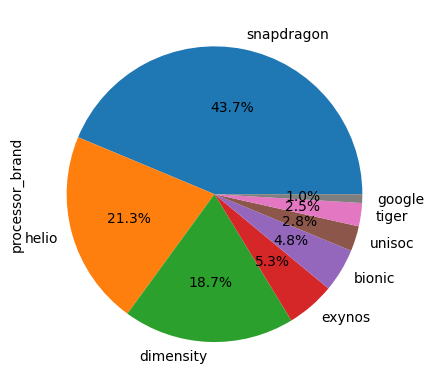

In [ ]:
# this pie chart shows % destribution of processor brands in market
df['processor_brand'].value_counts().head(8).plot(kind='pie',autopct='%0.1f%%')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    float64

<Axes: ylabel='fast_charging_available'>

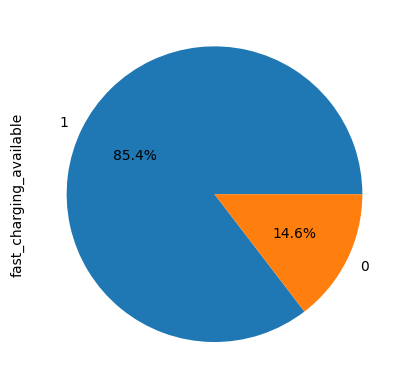

In [ ]:
# this pie chart shows % of phones which have fast charging features
df['fast_charging_available'].value_counts().plot(kind='pie',autopct='%0.1f%%')


<Axes: ylabel='ram_capacity'>

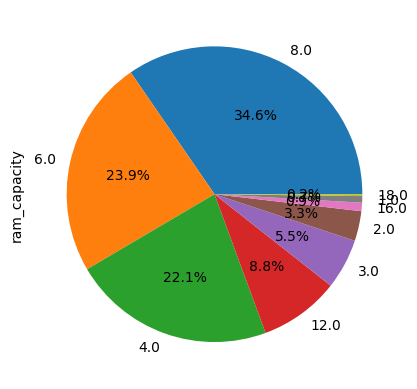

In [ ]:
# this pie chart shows % destribution of ram capacity of phones in market
df['ram_capacity'].value_counts().plot(kind='pie',autopct='%0.1f%%')


<Axes: ylabel='internal_memory'>

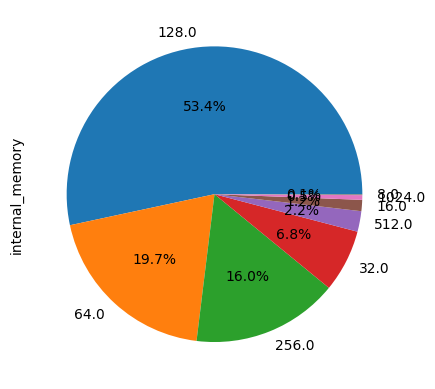

In [ ]:
# this pie chart shows % destribution of internal memory capacity of phones in market
df['internal_memory'].value_counts().plot(kind='pie',autopct='%0.1f%%')


<Axes: ylabel='refresh_rate'>

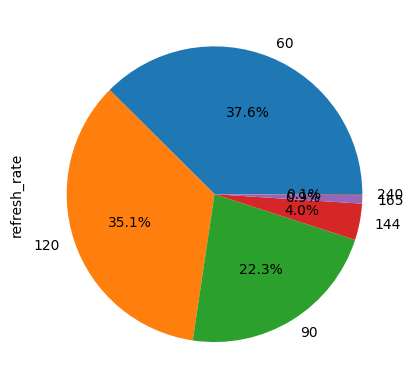

In [ ]:
# this pie chart shows % destribution of refresh rate feature
df['refresh_rate'].value_counts().plot(kind='pie',autopct='%0.1f%%')


<Axes: >

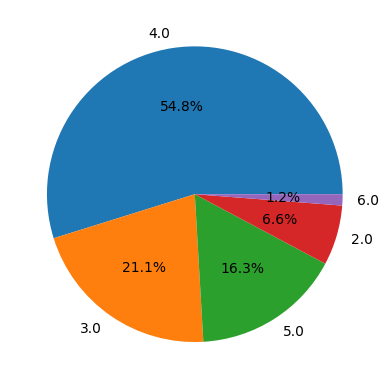

In [ ]:
# this pie chart shows % destribution of number of rear camera have in phones
(df['num_rear_cameras'] + df['num_front_cameras']).value_counts().plot(kind='pie', autopct='%0.1f%%')

<Axes: ylabel='os'>

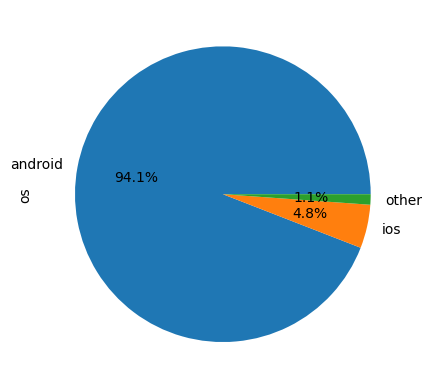

In [ ]:
# this pie chart shows % destribution of number of OS in phones
df['os'].value_counts().plot(kind='pie', autopct='%0.1f%%')

<Axes: ylabel='extended_memory_available'>

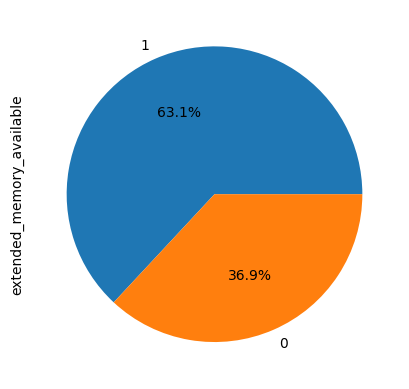

In [ ]:
# this pie chart shows % destribution of availability of extended memory feature
df['extended_memory_available'].value_counts().plot(kind='pie', autopct='%0.1f%%')

<Axes: >

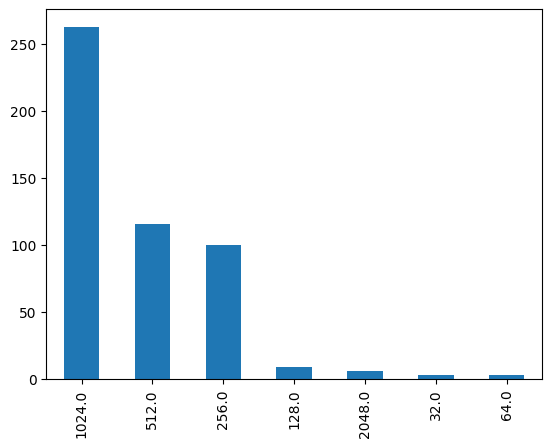

In [ ]:
# this pie chart shows % destribution of availability of extended upto feature
df['extended_upto'].value_counts().plot(kind='bar')


In [ ]:
# here i have made a function which return a boxplot and bar chart so i can plot all column's chart by calling a function
def plot_graphs(col):
 sns.displot(kind='hist',kde=True,data=df,x=col,label=col)
 sns.catplot(kind='box',data=df,x=col)

In [ ]:
num_col = df.select_dtypes(include=['float64','int64']).iloc[:,[3,4,6,9,13,14,16]].columns

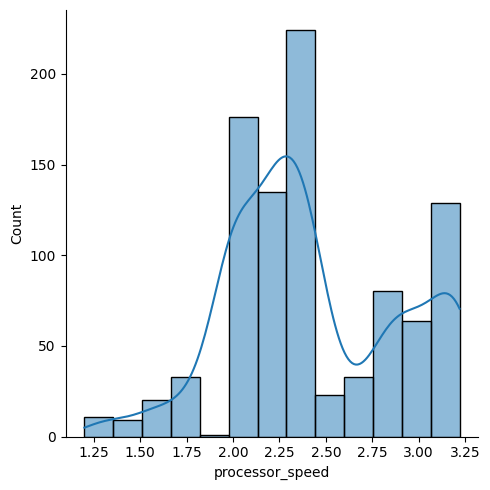

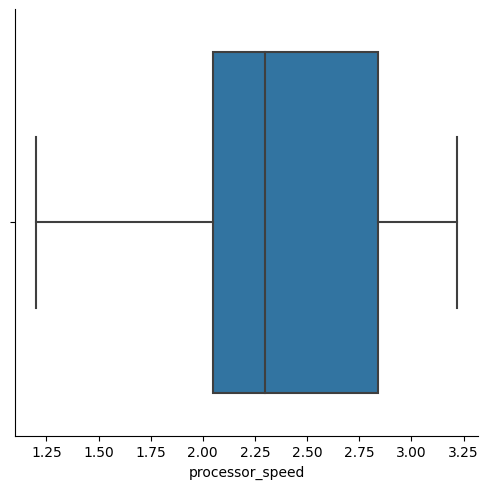

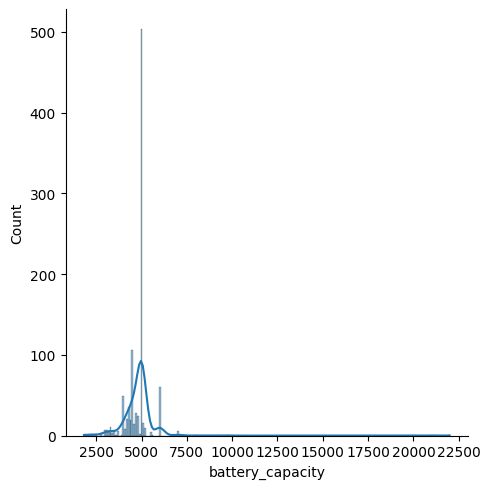

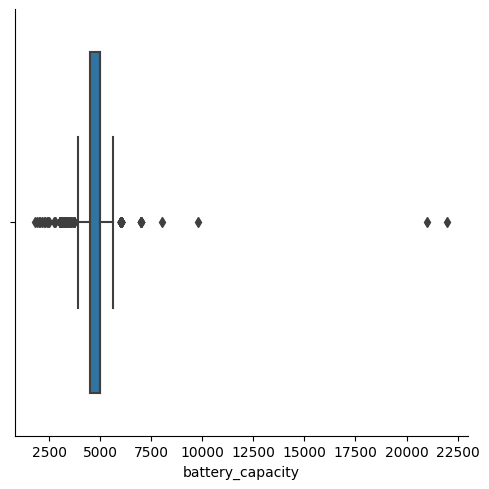

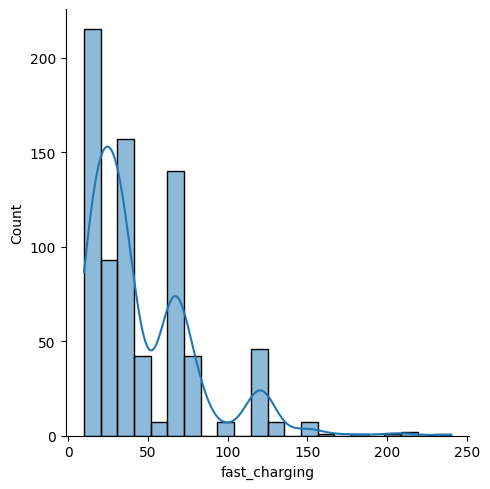

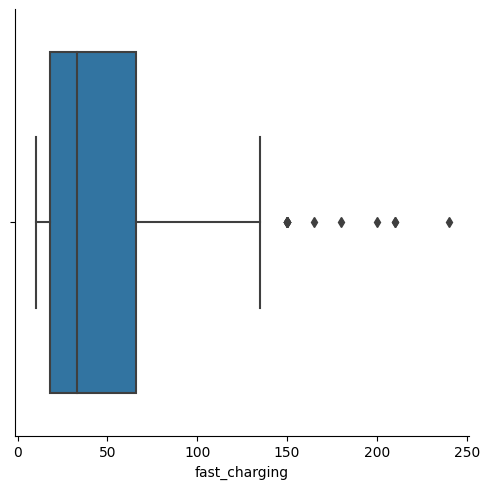

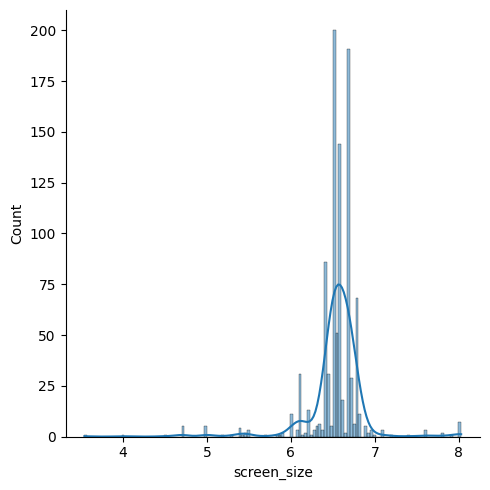

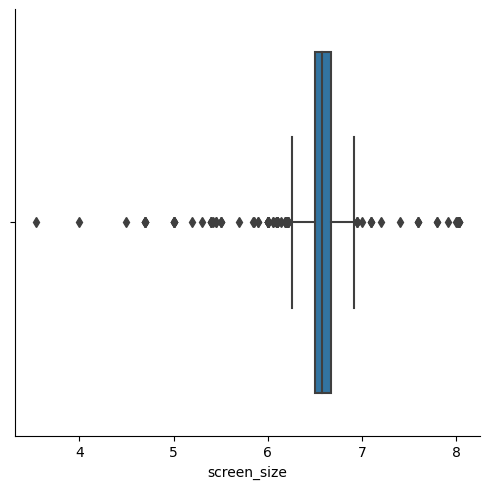

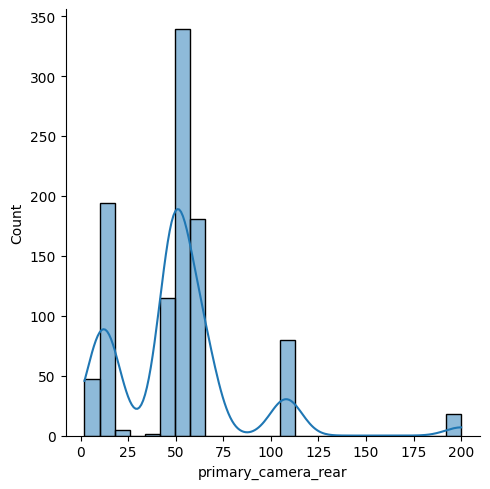

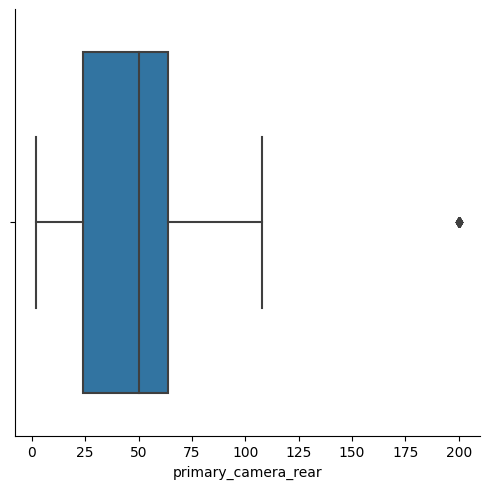

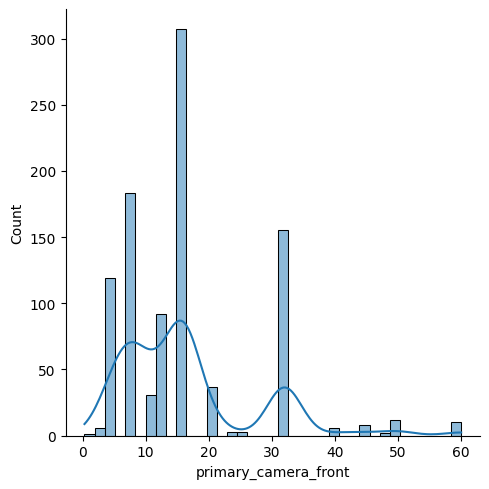

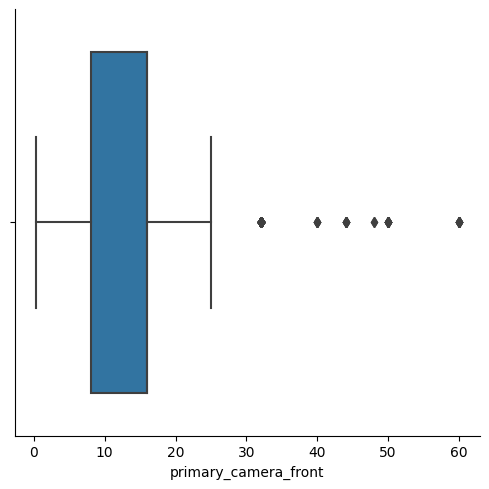

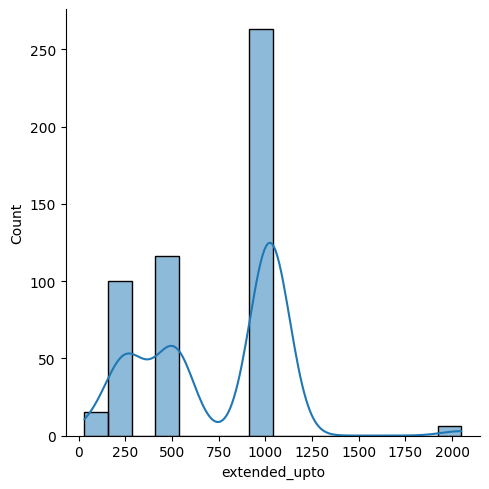

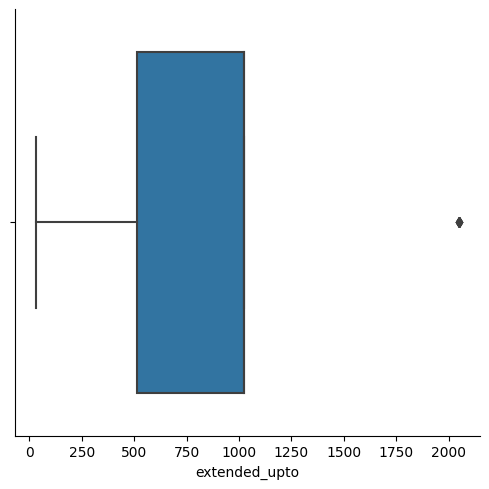

In [ ]:
for i in num_col:
  plot_graphs(i)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 [Text(0, 0, 'oneplus'),
  Text(1, 0, 'samsung'),
  Text(2, 0, 'motorola'),
  Text(3, 0, 'realme'),
  Text(4, 0, 'apple'),
  Text(5, 0, 'xiaomi'),
  Text(6, 0, 'nothing'),
  Text(7, 0, 'oppo'),
  Text(8, 0, 'vivo'),
  Text(9, 0, 'poco'),
  Text(10, 0, 'iqoo'),
  Text(11, 0, 'jio'),
  Text(12, 0, 'gionee'),
  Text(13, 0, 'tecno'),
  Text(14, 0, 'tesla'),
  Text(15, 0, 'google'),
  Text(16, 0, 'infinix'),
  Text(17, 0, 'cola'),
  Text(18, 0, 'letv'),
  Text(19, 0, 'ikall'),
  Text(20, 0, 'leeco'),
  Text(21, 0, 'duoqin'),
  Text(22, 0, 'nokia'),
  Text(23, 0, 'lava'),
  Text(24, 0, 'honor'),
  Text(25, 0, 'nubia'),
  Text(26, 0, 'redmi'),
  Text(27, 0, 'asus'),
  Text(28, 0, 'itel'),
  Text(29, 0, 'royole'),
  Text(30, 0, 'sony'),
  Text(31, 0, 'oukitel'),
  Text(32, 0, 'vertu'),
 

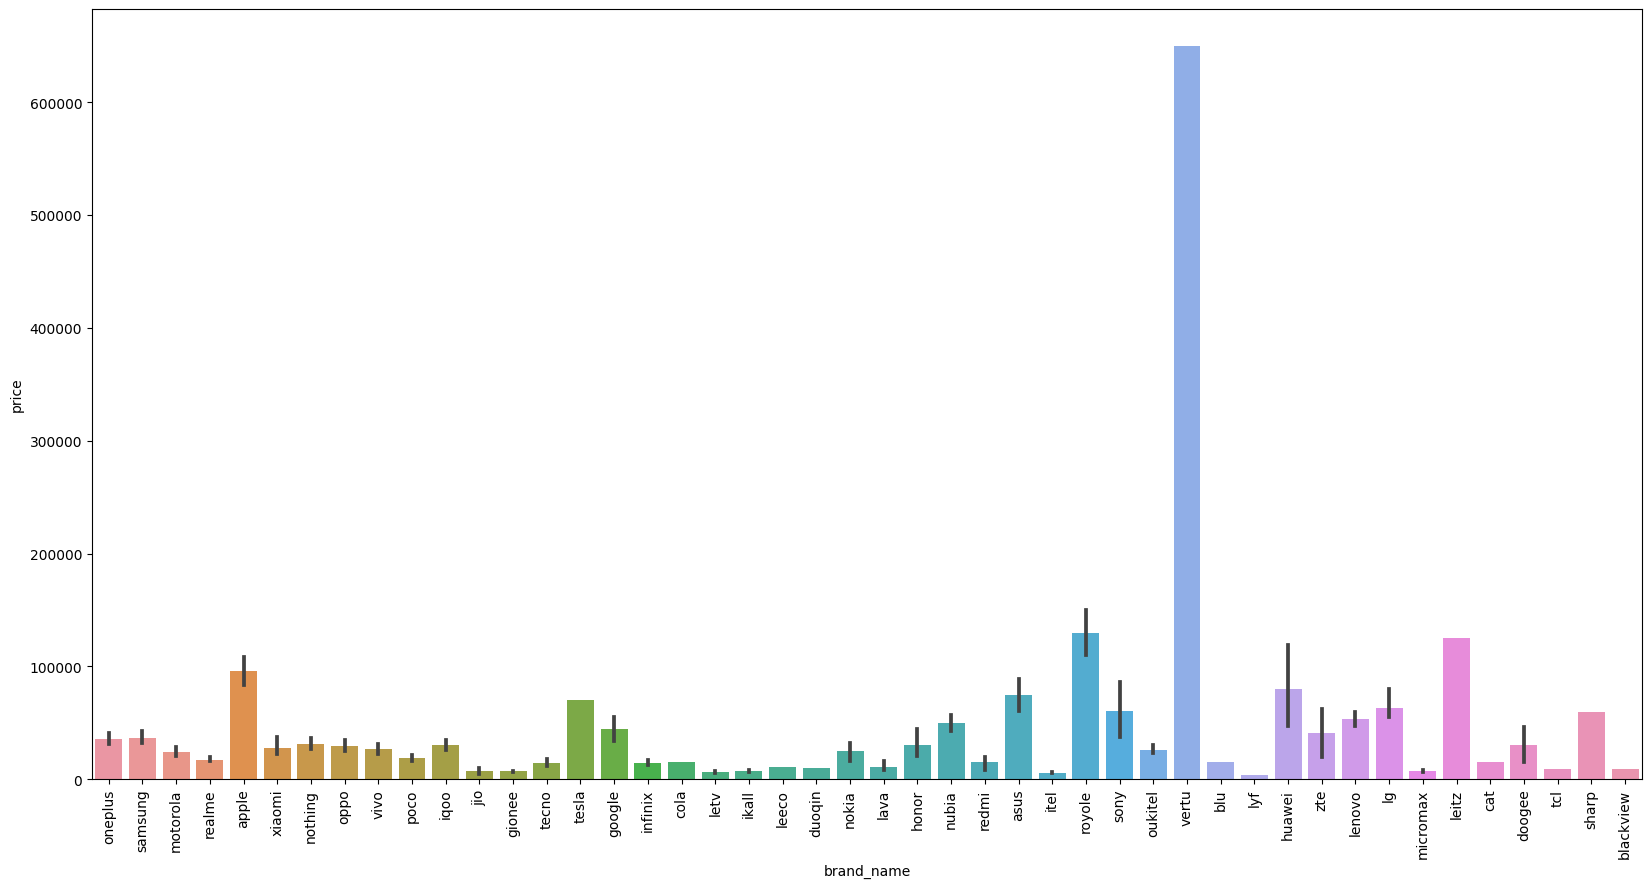

In [ ]:
# now am doing bivariate analysis here, so first i go with brand name with its price
plt.figure(figsize=(20,10))
sns.barplot(data=df,x='brand_name', y='price')
plt.xticks(rotation='vertical')

In [ ]:
x = df.groupby('brand_name').count()['model']

In [ ]:
temp_df= df[df['brand_name'].isin(x[x>10].index)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'oneplus'),
  Text(1, 0, 'samsung'),
  Text(2, 0, 'motorola'),
  Text(3, 0, 'realme'),
  Text(4, 0, 'apple'),
  Text(5, 0, 'xiaomi'),
  Text(6, 0, 'oppo'),
  Text(7, 0, 'vivo'),
  Text(8, 0, 'poco'),
  Text(9, 0, 'iqoo'),
  Text(10, 0, 'tecno'),
  Text(11, 0, 'google'),
  Text(12, 0, 'infinix'),
  Text(13, 0, 'nokia'),
  Text(14, 0, 'honor'),
  Text(15, 0, 'huawei')])

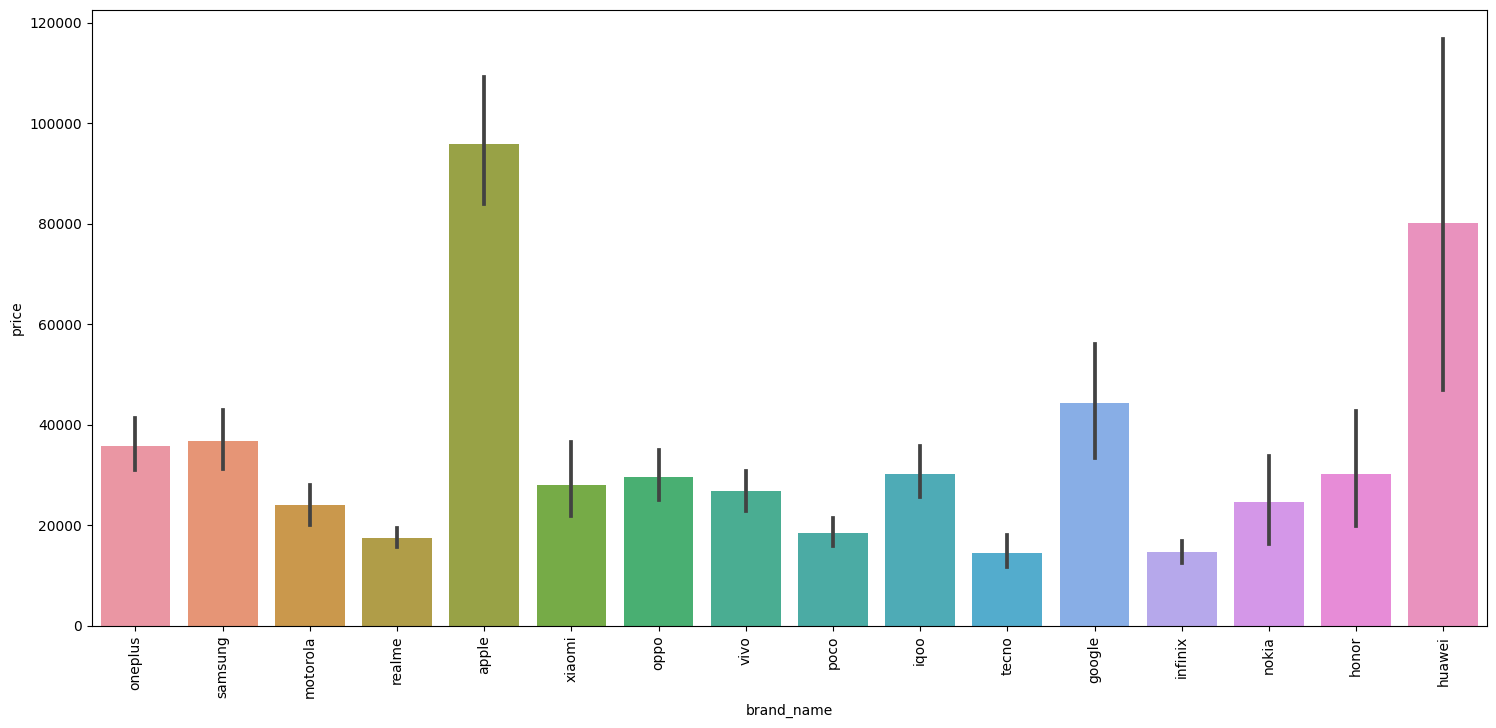

In [ ]:
plt.figure(figsize=(18,8))
sns.barplot(data=temp_df,x='brand_name', y=temp_df['price'].sort_values(ascending=False))
plt.xticks(rotation='vertical')

<Axes: xlabel='rating', ylabel='price'>

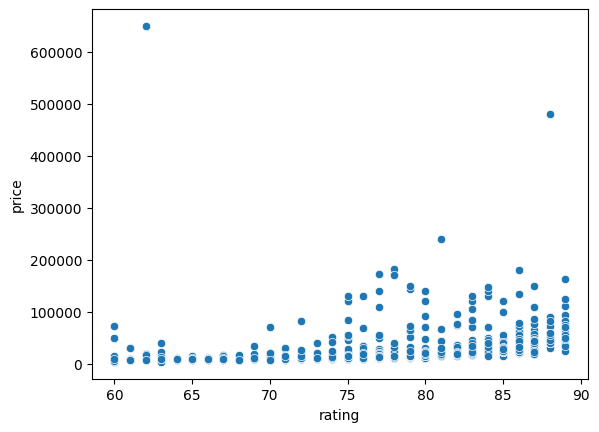

In [ ]:
# now i go with rating with price
sns.scatterplot(data=df,x='rating',y='price')

<Axes: xlabel='has_5g', ylabel='price'>

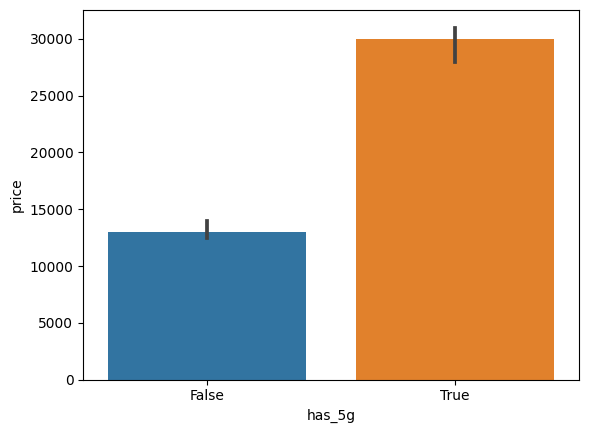

In [ ]:
# now i go with has_5G with price
sns.barplot(data=temp_df,x='has_5g',y='price',estimator=np.median)

<Axes: xlabel='has_nfc', ylabel='price'>

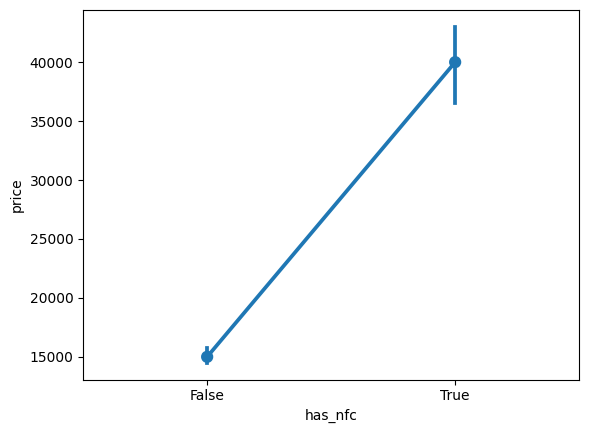

In [ ]:
# now i go with has_nfc with price
sns.pointplot(data=temp_df,x='has_nfc',y='price',estimator=np.median)

<Axes: xlabel='has_ir_blaster', ylabel='price'>

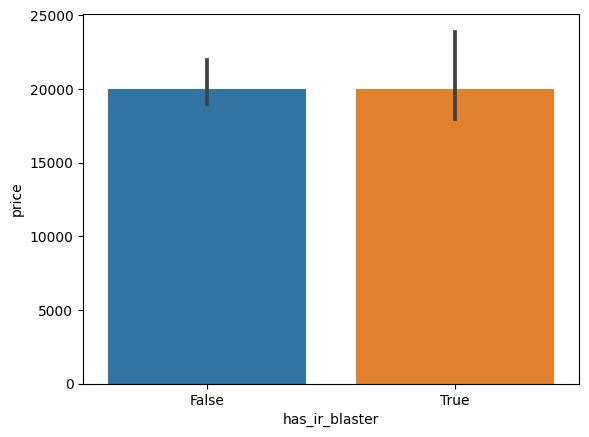

In [ ]:
# now i go with has_ir_blaster with price
sns.barplot(data=temp_df,x='has_ir_blaster',y='price',estimator=np.median)

In [ ]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 893 entries, 0 to 979
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 893 non-null    object 
 1   model                      893 non-null    object 
 2   price                      893 non-null    int64  
 3   rating                     816 non-null    float64
 4   has_5g                     893 non-null    bool   
 5   has_nfc                    893 non-null    bool   
 6   has_ir_blaster             893 non-null    bool   
 7   processor_brand            880 non-null    object 
 8   num_cores                  887 non-null    float64
 9   processor_speed            853 non-null    float64
 10  battery_capacity           882 non-null    float64
 11  fast_charging_available    893 non-null    int64  
 12  fast_charging              722 non-null    float64
 13  ram_capacity               893 non-null    float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'snapdragon'),
  Text(1, 0, 'exynos'),
  Text(2, 0, 'dimensity'),
  Text(3, 0, 'bionic'),
  Text(4, 0, 'helio'),
  Text(5, 0, 'unisoc'),
  Text(6, 0, 'google'),
  Text(7, 0, 'tiger'),
  Text(8, 0, 'sc9863a'),
  Text(9, 0, 'fusion'),
  Text(10, 0, 'kirin'),
  Text(11, 0, 'spreadtrum'),
  Text(12, 0, 'mediatek')])

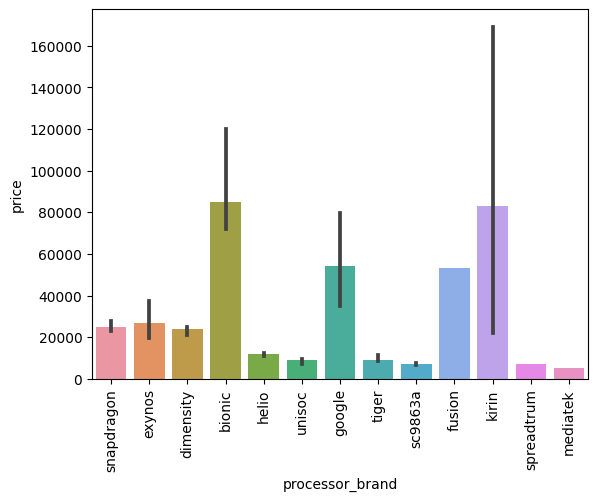

In [ ]:
# now i go with processor brand with price
sns.barplot(data=temp_df,x='processor_brand',y='price',estimator=np.median)
plt.xticks(rotation='vertical')

(array([0, 1, 2]), [Text(0, 0, '4.0'), Text(1, 0, '6.0'), Text(2, 0, '8.0')])

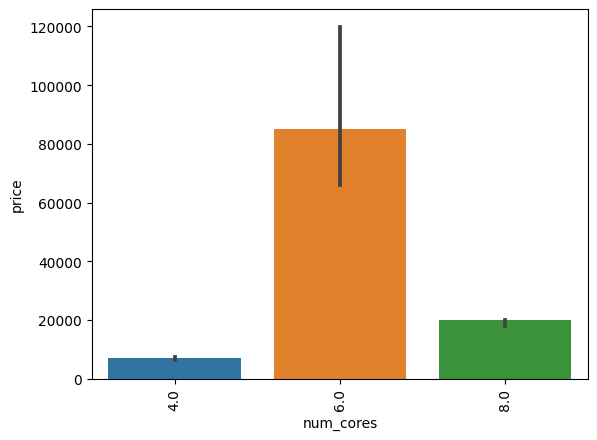

In [ ]:
# now i go with number of core with price
sns.barplot(data=temp_df,x='num_cores',y='price',estimator=np.median)
plt.xticks(rotation='vertical')

In [ ]:
# android,ios,other with num_cores
pd.crosstab(df['num_cores'],df['os'])

os,android,ios,other
num_cores,,,
4.0,33,1,1
6.0,0,39,0
8.0,875,1,10


<Axes: xlabel='processor_speed', ylabel='price'>

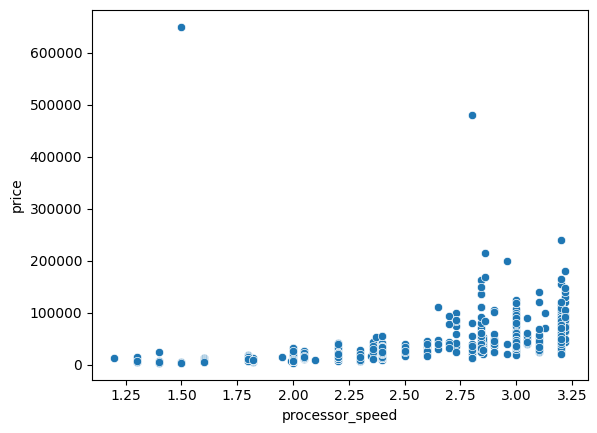

In [ ]:
# now i go with processor speed with price
sns.scatterplot(data=df,x='processor_speed',y='price')

<Axes: xlabel='screen_size', ylabel='price'>

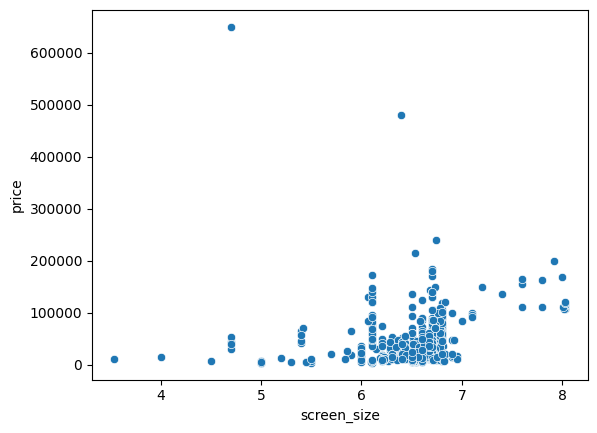

In [ ]:
# now i go with screen size with price
sns.scatterplot(data=df,x='screen_size',y='price')


In [ ]:
 # find correlation b/w all columns
 df.corr()

<ipython-input-52-a9f0b6390099>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,price,rating,has_5g,has_nfc,has_ir_blaster,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
price,1.000000,0.283504,0.305066,0.470951,-0.015807,-0.048561,0.474049,-0.159232,0.116739,0.277591,0.386002,0.557168,0.113253,0.244115,0.125330,0.115228,0.092095,0.162995,-0.448628,0.091945
rating,0.283504,1.000000,0.596087,0.474754,0.156421,0.199741,0.628446,-0.015581,0.542814,0.527613,0.757613,0.481070,0.298272,0.610795,0.515531,0.131480,0.562046,0.577861,-0.415265,0.346761
has_5g,0.305066,0.596087,1.000000,0.481702,0.105542,0.139607,0.609583,-0.013237,0.355858,0.440624,0.533957,0.403837,0.230598,0.611794,0.206512,0.058059,0.347918,0.358769,-0.507752,0.392268
has_nfc,0.470951,0.474754,0.481702,1.000000,-0.032541,0.026165,0.609664,-0.106104,0.237947,0.383231,0.458336,0.413071,0.103099,0.410777,0.166299,0.066278,0.131004,0.285427,-0.564380,0.187599
has_ir_blaster,-0.015807,0.156421,0.105542,-0.032541,1.000000,0.120363,0.102744,0.059852,0.174060,0.187605,0.059460,0.030789,0.140809,0.178378,0.198043,-0.011380,0.243608,0.010399,-0.041676,-0.060974
num_cores,-0.048561,0.199741,0.139607,0.026165,0.120363,1.000000,0.192863,0.241289,0.360476,0.115413,0.303911,0.043934,0.385652,0.233010,0.343150,0.047578,0.312394,0.221483,0.072934,0.198742
processor_speed,0.474049,0.628446,0.609583,0.609664,0.102744,0.192863,1.000000,-0.041930,0.345856,0.615657,0.627234,0.525510,0.290366,0.555004,0.255476,0.124191,0.281204,0.398207,-0.663085,0.259733
battery_capacity,-0.159232,-0.015581,-0.013237,-0.106104,0.059852,0.241289,-0.041930,1.000000,0.128993,-0.078096,0.085690,-0.001444,0.348805,0.088636,0.155410,-0.072366,0.171465,-0.005111,0.174683,0.238755
fast_charging_available,0.116739,0.542814,0.355858,0.237947,0.174060,0.360476,0.345856,0.128993,1.000000,NaN,0.439538,0.279877,0.346687,0.415278,0.470952,0.072208,0.427440,0.331769,-0.166626,0.333016
fast_charging,0.277591,0.527613,0.440624,0.383231,0.187605,0.115413,0.615657,-0.078096,NaN,1.000000,0.533602,0.380985,0.258955,0.546374,0.126803,0.012674,0.390718,0.392673,-0.563131,0.026669


<ipython-input-53-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

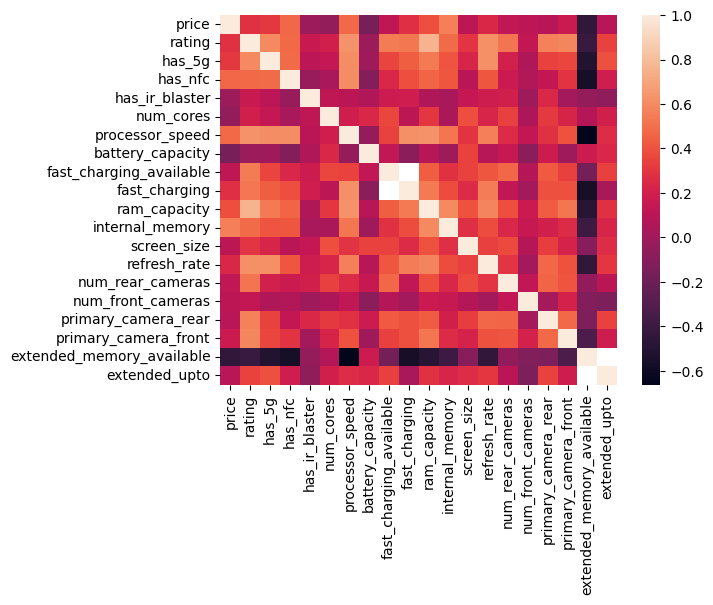

In [ ]:
sns.heatmap(df.corr())

In [ ]:
# in last thing i will fill missing values in of columns with correlation techniqu.
df.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
resolution                     0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
dtype: int64

In [ ]:
# ratings almost depends all of the columns, so fill missing values i have to take help of all the columns
df.corr()['rating']

<ipython-input-79-9eeedc55dc46>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['rating']


price                        0.283504
rating                       1.000000
has_5g                       0.596087
has_nfc                      0.474754
has_ir_blaster               0.156421
num_cores                    0.199741
processor_speed              0.628446
battery_capacity            -0.015581
fast_charging_available      0.542814
fast_charging                0.527613
ram_capacity                 0.757613
internal_memory              0.481070
screen_size                  0.298272
refresh_rate                 0.610795
num_rear_cameras             0.515531
num_front_cameras            0.131480
primary_camera_rear          0.562046
primary_camera_front         0.577861
extended_memory_available   -0.415265
extended_upto                0.346761
Name: rating, dtype: float64

In [ ]:
from sklearn.impute import KNNImputer
# i use Knn imputer for this
# Knn imputer works only on numeric columns only so i fetch all numeric columns here
df.select_dtypes(include=['int64','float64'])

,price,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,54999,89.0,8.0,3.20,5000.0,1,100.0,12.0,256.0,6.70,120,3,1.0,50.0,16.0,0,NaN
1,19989,81.0,8.0,2.20,5000.0,1,33.0,6.0,128.0,6.59,120,3,1.0,64.0,16.0,1,1024.0
2,16499,75.0,8.0,2.40,5000.0,1,15.0,4.0,64.0,6.60,90,3,1.0,50.0,13.0,1,1024.0
3,14999,81.0,8.0,2.20,5000.0,1,NaN,6.0,128.0,6.55,120,3,1.0,50.0,16.0,1,1024.0
4,24999,82.0,8.0,2.60,5000.0,1,67.0,6.0,128.0,6.70,120,3,1.0,108.0,16.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,34990,83.0,8.0,3.00,5000.0,1,68.0,8.0,128.0,6.67,120,3,1.0,64.0,16.0,0,NaN
976,14990,75.0,8.0,2.20,5000.0,1,22.0,6.0,128.0,6.50,60,3,1.0,48.0,8.0,1,1024.0
977,28990,85.0,8.0,2.85,5080.0,1,67.0,8.0,256.0,6.60,144,3,1.0,64.0,16.0,0,NaN
978,19990,80.0,8.0,2.20,5000.0,1,NaN,6.0,128.0,6.80,60,3,1.0,108.0,32.0,1,1024.0


In [ ]:
# i drop price column because i don't think we should use price column to fill missing values
x_df=df.select_dtypes(include=['int64','float64']).drop(columns='price')

In [ ]:
imputer = KNNImputer(n_neighbors=5)

In [ ]:
x_df_values= imputer.fit_transform(x_df) # this is a numpy array i will covert it to dataframe in next cell

In [ ]:
pd.DataFrame(x_df_values, columns=x_df.columns)

,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,89.0,8.0,3.20,5000.0,1.0,100.0,12.0,256.0,6.70,120.0,3.0,1.0,50.0,16.0,0.0,870.4
1,81.0,8.0,2.20,5000.0,1.0,33.0,6.0,128.0,6.59,120.0,3.0,1.0,64.0,16.0,1.0,1024.0
2,75.0,8.0,2.40,5000.0,1.0,15.0,4.0,64.0,6.60,90.0,3.0,1.0,50.0,13.0,1.0,1024.0
3,81.0,8.0,2.20,5000.0,1.0,29.2,6.0,128.0,6.55,120.0,3.0,1.0,50.0,16.0,1.0,1024.0
4,82.0,8.0,2.60,5000.0,1.0,67.0,6.0,128.0,6.70,120.0,3.0,1.0,108.0,16.0,0.0,1024.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,83.0,8.0,3.00,5000.0,1.0,68.0,8.0,128.0,6.67,120.0,3.0,1.0,64.0,16.0,0.0,1024.0
976,75.0,8.0,2.20,5000.0,1.0,22.0,6.0,128.0,6.50,60.0,3.0,1.0,48.0,8.0,1.0,1024.0
977,85.0,8.0,2.85,5080.0,1.0,67.0,8.0,256.0,6.60,144.0,3.0,1.0,64.0,16.0,0.0,870.4
978,80.0,8.0,2.20,5000.0,1.0,25.4,6.0,128.0,6.80,60.0,3.0,1.0,108.0,32.0,1.0,1024.0


In [ ]:
x_df1= pd.DataFrame(x_df_values, columns=x_df.columns) # here we can see there are zero missing value

In [ ]:
x_df['price'] = df['price']

In [ ]:
x_df.head()

,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,price
0,89.0,8.0,3.2,5000.0,1,100.0,12.0,256.0,6.70,120,3,1.0,50.0,16.0,0,NaN,54999
1,81.0,8.0,2.2,5000.0,1,33.0,6.0,128.0,6.59,120,3,1.0,64.0,16.0,1,1024.0,19989
2,75.0,8.0,2.4,5000.0,1,15.0,4.0,64.0,6.60,90,3,1.0,50.0,13.0,1,1024.0,16499
3,81.0,8.0,2.2,5000.0,1,NaN,6.0,128.0,6.55,120,3,1.0,50.0,16.0,1,1024.0,14999
4,82.0,8.0,2.6,5000.0,1,67.0,6.0,128.0,6.70,120,3,1.0,108.0,16.0,0,NaN,24999


In [ ]:
# here we will do comparision between before correlation and after correlation

a =x_df.corr()['price'].reset_index()
b= df.corr()['price'].reset_index()

<ipython-input-89-b1cda9396f55>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  b= df.corr()['price'].reset_index()


In [ ]:
b.merge(a,on= 'index') # here we can see dependence has improved on most of columns

,index,price_x,price_y
0,price,1.000000,1.000000
1,rating,0.283504,0.283504
2,num_cores,-0.048561,-0.048561
3,processor_speed,0.474049,0.474049
4,battery_capacity,-0.159232,-0.159232
5,fast_charging_available,0.116739,0.116739
6,fast_charging,0.277591,0.277591
7,ram_capacity,0.386002,0.386002
8,internal_memory,0.557168,0.557168
9,screen_size,0.113253,0.113253


### **Conclusion**

1.The most popular smartphone brands in India are Samsung, Xiaomi, Realme, and OPPO.

2.The average price of a smartphone in India is around ₹20,000.

3.The most popular smartphone features in India are 5G, NFC, and IR blaster.

4.The most popular processor brands in India are Qualcomm, MediaTek, and Samsung.

5.The most popular operating systems in India are Android and iOS.

6.The correlation between price and rating is positive, but not very strong.

7.The correlation between price and other features such as 5G, NFC, and IR blaster is also positive, but not very strong.

8.The use of KNN imputer to fill missing values in the dataset has improved the correlation between price and other features.

Overall, the analysis shows that the Indian smartphone market is dominated by a few major brands and that there is a positive correlation between price and some key features. The use of KNN imputer to fill missing values has improved the correlation between price and other features, suggesting that this is a promising technique for improving the quality of data.

------------------------------------------------------------------------
Here are some additional insights that can be drawn from the analysis:

* The popularity of 5G is increasing in India, but it is still not a major factor in determining the price of a smartphone.

* NFC is a less popular feature, but it is becoming more common in high-end smartphones.

* IR blaster is a very niche feature, but it is popular among some users.

* Qualcomm is the most popular processor brand in India, followed by MediaTek and Samsung.

* Android is the most popular operating system in India, followed by iOS.

The analysis provides valuable insights into the Indian smartphone market and can be used to make informed decisions about product development and marketing.